# Обобщени полиноми. Интерполиране с обобщени полиноми

### Задача 1

В таблицата са дадени данни за развитието на бактериална популация

|  t, h  |  1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- | 
| бр. клетки (x1000)|  1 |12| 110 | 1037 | 12218 |

Да се намери подходяща функция, която интерполира данните. Да се начертаят данните и графиката на функцията в една координатна система.

In [191]:
import numpy as np
import matplotlib.pyplot as plt

t = np.array([1,2,3,4,5])
cells = np.array([1,12,110,1037,12218])

# np.linalg.solve()


In [192]:
def basis_functions(x):
    return np.array([1, np.exp(x), np.exp(2*x),np.exp(3*x),np.exp(4*x)])

# np.array([basis_functions(1), basis_functions(2)], bas)

A=np.zeros([5,5])
for i in range(len(t)):
    A[i] = basis_functions(t[i])

sol = np.linalg.solve(A, cells)


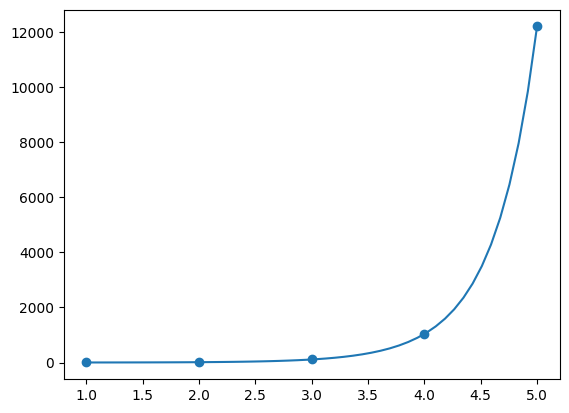

In [193]:
def exp_poly_1(x):
    poly = 0
    for i in range(len(t)):
        poly += sol[i]* np.exp(i*x)
    
    return poly

t_axis = np.linspace(t[0], t[4], 50)
plt.plot(t_axis, exp_poly_1(t_axis))
plt.scatter(t, cells)
plt.show()

### Задача 2

Пациент приема 5 mg/L от лекарство в момент t=0. В таблицата е описана промяната на концентрацията на лекарството в кръвта на пациента часове след приемането му
|  t, h  |  1 | 2 | 3 | 4 |
| --- | --- | --- | --- | --- | 
| concentration, mg/L|  1.571 |1.158| 1.049 | 1.018 |

Да се построи интерполационен полином по подходящ базис, който описва данните. Начертайте получения полином и съответните данни в една координатна система.

In [194]:
t = np.array([0, 1,2, 3, 4])
concentration = np.array([5, 1.571, 1.158, 1.049, 1.018])

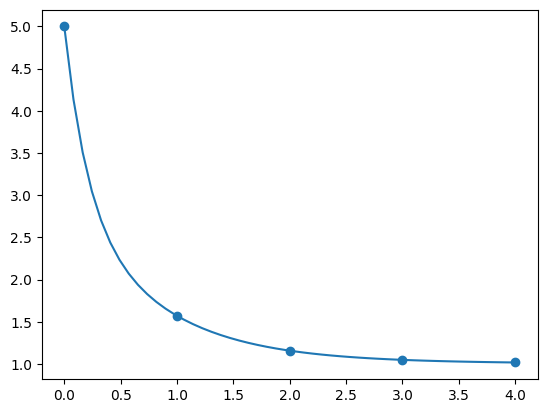

In [195]:
def basis_functions2(x):
    return np.array([1, np.exp(-x), np.exp(-2*x),np.exp(-3*x),np.exp(-4*x)])

A2 = np.zeros([5, 5])
for i in range (len(t)):
    A[i] = basis_functions2(t[i])

sol2 = np.linalg.solve(A, concentration)

def neg_exp_poly2(x):
    poly = 0
    for i in range(sol2.size):
        poly+=sol2[i]*np.exp(-i*x)
    
    return poly

t_axis2 = np.linspace(t[0], t[4], 50)
plt.plot(t_axis2, neg_exp_poly2(t_axis2))
plt.scatter(t, concentration)
plt.show()



### Задача 3


Дадени са данни за брой часове слънчева светлина, където x е денят от годината. Да се намери функция, която моделира броя часове слънчева светлина.

|  x|  0 | 61 | 152 | 243 | 334 |
| --- | --- | --- | --- | --- |---|
| часове слънчева светлина|  9 |11| 15 | 13 | 9.5 |

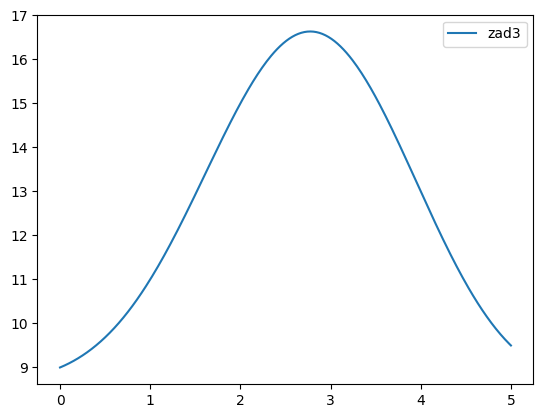

In [196]:
def trig_basis_functions(x):
    return np.array([1, np.cos(x), np.sin(x), np.cos(2*x), np.sin(2*x)])

def transform(arr):
    for i in range(len(arr)):
        arr[i] = ((2*np.pi)/365)*arr[i]

def create_poly(x, coeff):
    sum = 0
    n = len(coeff)
    func = trig_basis_functions(x)
    for i in range (n):
        sum+=coeff[i]*func[i]
    return sum

x_values = np.array([0, 61, 152, 243, 334])
y_values = np.array([9, 11, 15, 13, 9.5])
transform(x_values)
n = len(x_values)

A = np.zeros([n,n])
for i in range(n):
    A[i] = trig_basis_functions(x_values[i])

coeff = np.linalg.solve(A, y_values)
x_axis = np.linspace(x_values.min(), x_values.max(), 300)
y_axis = np.array([create_poly(x, coeff) for x in x_axis])
plt.plot(x_axis, y_axis, label = "zad3")
plt.legend()

### Задача 4

В таблицата са дадени данни от сигнал на акселерометър в 5 момента от време:

|  t, ms  |  1 | 1.5 | 3 | 4 | 6 |
| --- | --- | --- | --- | --- | --- | 
| ускорение, $m/s^2$|  0 |1| 1.2 | 4 | 2 |

Да се намери обобщен полином по подходящ базис, който интерполира тези данни, ако е известно, че сигналът се описва от периодична функция с период а) $T=2\pi$; б) $T=8$.
Да се начертае графиката на полинома в интервала $[0, 4 \pi]$ заедно с точките в една координатна система във всеки от случаите.

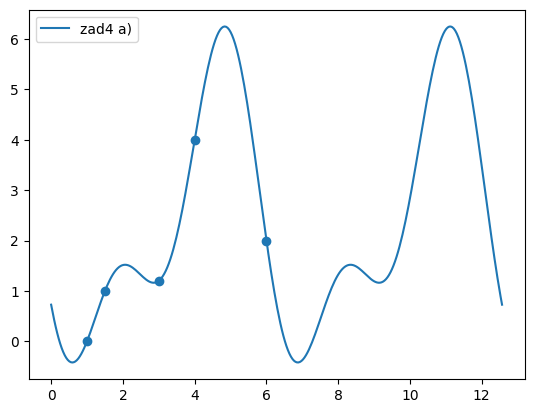

In [197]:
x_values = np.array([1, 1.5, 3, 4, 6])
y_values = np.array([0,1,1.2,4,2])
n = len(x_values)
A = np.zeros([n,n])
for i in range(n):
    A[i] = trig_basis_functions(x_values[i])

coeff = np.linalg.solve(A, y_values)
x_axis = np.linspace(0, 4*np.pi, 300)
y_axis = np.array([create_poly(x, coeff) for x in x_axis])
plt.scatter(x_values, y_values)
plt.plot(x_axis, y_axis, label = "zad4 a)")
plt.legend()

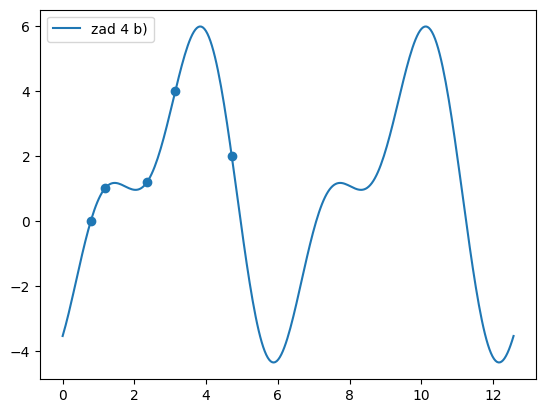

In [198]:
x_values = np.array([1, 1.5, 3, 4, 6])
y_values = np.array([0,1,1.2,4,2])
x_values = (2*np.pi/8)*x_values
n = len(x_values)
A = np.zeros([n,n])
for i in range(n):
    A[i] = trig_basis_functions(x_values[i])

coeff = np.linalg.solve(A, y_values)
x_axis = np.linspace(0, 4*np.pi, 300)
y_axis = np.array([create_poly(x, coeff) for x in x_axis])
plt.scatter(x_values, y_values)
plt.plot(x_axis, y_axis, label = "zad 4 b)")
plt.legend()

### Задача 5


В таблицата са дадени данни за средните месечни количества слънчева радиация на територията на България, като лиспват данни за м. август

|  t, месец  |  Я | Ф | М | А | М | Ю | Ю | A | С | O | Н | Д |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| слънчева радиация, $W/m^2$|45.9| 78.2 | 123.5| 172.6| 223.5| 255.3| 286.0| | 183.9| 116.2 | 57.8| 37.7|

Данните са осреднени на 30 дни, т.е. можем да считаме, че разстоянието между измерванията в два съседни месеца е 30. Като се има предвид това, както и факта, че разглежданият процес е с период 365 дни, да се намери обобщен полином по подходящ базис, който описва данните в таблицата. Като се използва така намереният полином, да се пресметне приближено количеството слънчева радиация, съответстващо на м. август. Да се сравни с действителната стойност - $257.9 W/m^2$.

In [ ]:
def trig_basis_functions(x):
    # return np.array([1, np.cos(x), np.sin(x), np.cos(2*x), np.sin(2*x)])

x_values = np.arange(0, 12*30, 30)
x_values = np.delete(x_values, 7)
x_values = (2*np.pi/365)*x_values
y_values = np.array([45.9, 78.2 , 123.5, 172.6, 223.5, 255.3, 286.0, 183.9, 116.2 , 57.8, 37.7])
n = len(x_values)
A = np.zeros([n,n])
for i in range(n):
    A[i] = trig_basis_functions(x_values[i])

coeff = np.linalg.solve(A, y_values)
# x_axis = np.linspace(0, 4*np.pi, 300)
y_axis = np.array([create_poly(x, coeff) for x in x_axis])
plt.scatter(x_values, y_values)
plt.plot(x_axis, y_axis, label = "zad 5")
plt.legend()

array([0.        , 0.51642619, 1.03285238, 1.54927857, 2.06570476,
       2.58213095, 3.09855714, 4.13140952, 4.64783571, 5.1642619 ,
       5.68068809])